In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("house_prices.csv")
df

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [ ]:
#basic statistics and structure of the dataset:

In [5]:
df.shape

(99499, 9)

In [6]:
df.columns

Index(['Unnamed: 0', 'property_type', 'price', 'location', 'city', 'baths',
       'purpose', 'bedrooms', 'Area_in_Marla'],
      dtype='object')

In [7]:
(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99499.0,7.888389e+04,4.823942e+04,0.0,37236.5,76065.0,119401.5,168445.0
price,99499.0,1.037592e+07,1.066000e+07,15500.0,150000.0,7500000.0,15500000.0,44900000.0
baths,99499.0,3.530106e+00,1.474217e+00,1.0,2.0,3.0,5.0,7.0
bedrooms,99499.0,3.350737e+00,1.255913e+00,0.0,2.0,3.0,4.0,6.0
Area_in_Marla,99499.0,8.757479e+00,7.466471e+00,0.0,4.8,6.7,10.0,194.0


In [41]:
#the highest property price = 44900000.0 and lowest property price = 15500.0

In [ ]:
#Data Cleaning:

In [9]:
df.isna().sum()

Unnamed: 0       0
property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [14]:
city=df["city"].unique()
print(f"How many city in dataset={city}")

How many city in dataset=['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']


In [ ]:
# Price Distribution

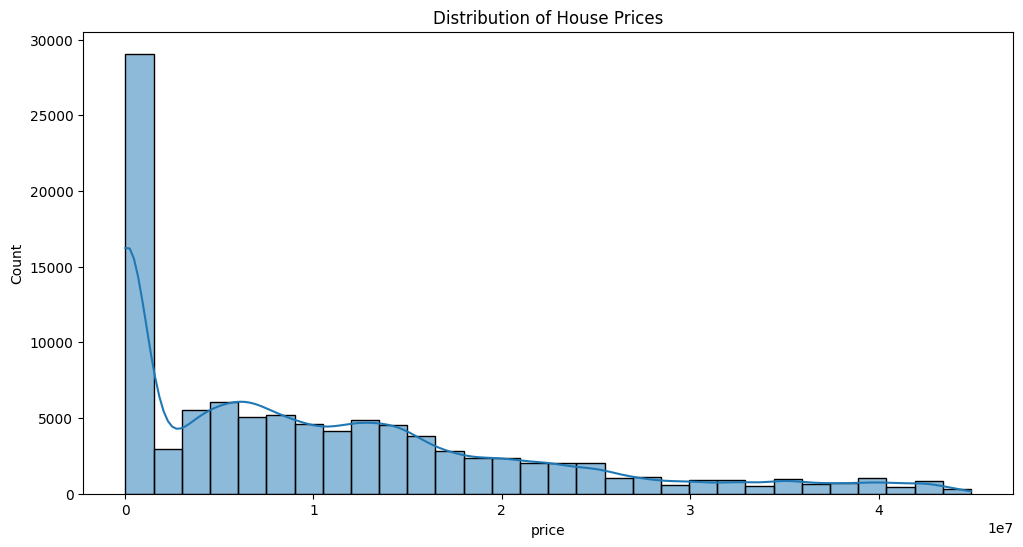

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()

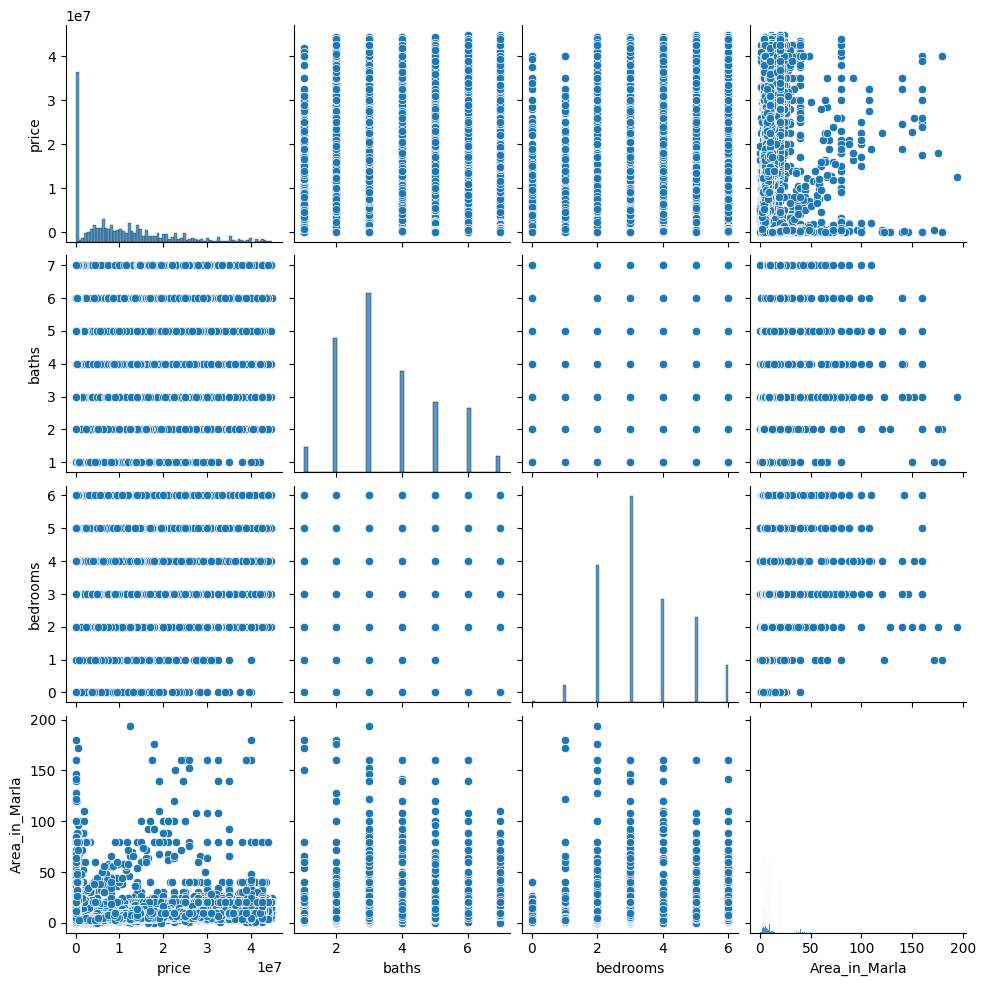

In [4]:
# Pairplot for numerical features
sns.pairplot(df[['price', 'baths', 'bedrooms', 'Area_in_Marla']])
plt.show()

In [ ]:
#Explore relationships with categorical variables:

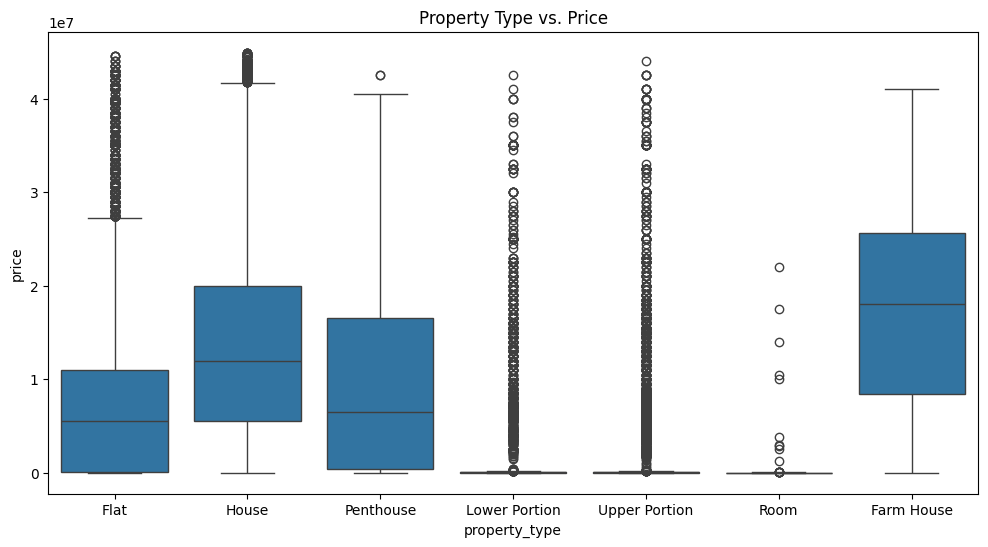

In [5]:
# Boxplot for property_type vs. price
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Property Type vs. Price')
plt.show()

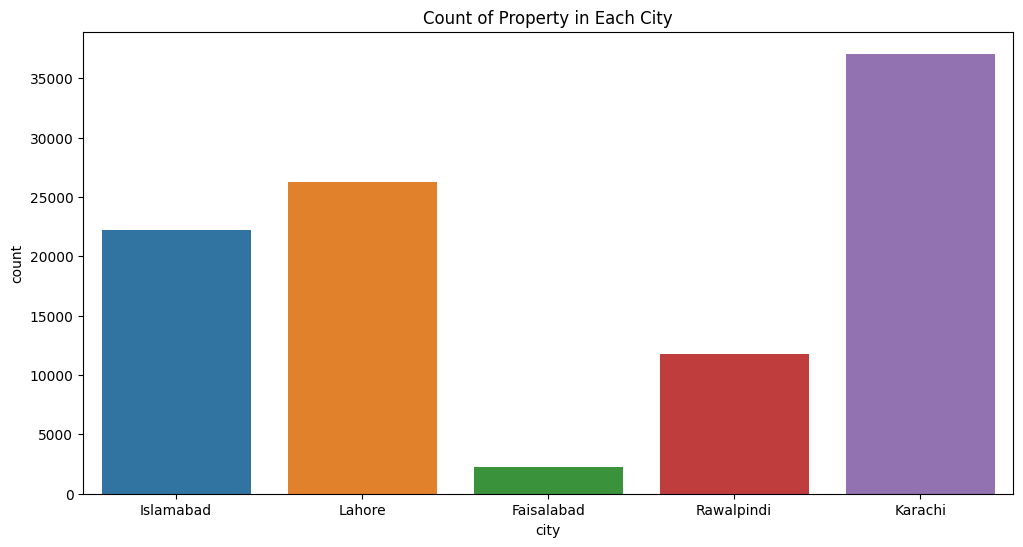

In [10]:
# Countplot for city
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=df,hue="city")
plt.title('Count of Property in Each City')
plt.show()

In [25]:
purpose=df["purpose"].unique()
print(f"how many purpose in dataset ={purpose}")

how many purpose in dataset =['For Sale' 'For Rent']


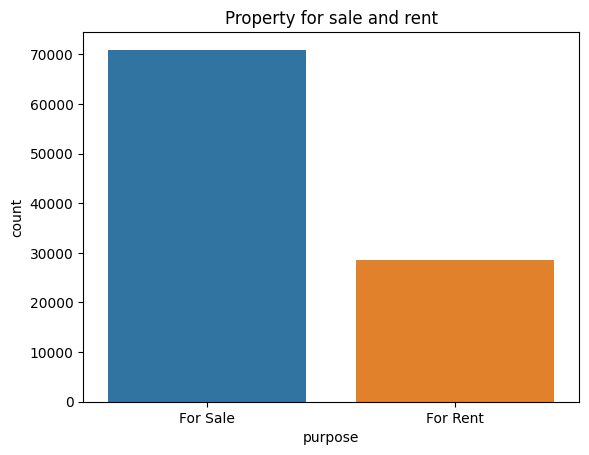

In [49]:
sns.countplot(x=df["purpose"],data=df,hue="purpose")
plt.title("Property for sale and rent")
plt.show()

In [27]:
property=df["property_type"].unique()
print(f"how many types of property ={property}")

how many types of property =['Flat' 'House' 'Penthouse' 'Lower Portion' 'Upper Portion' 'Room'
 'Farm House']


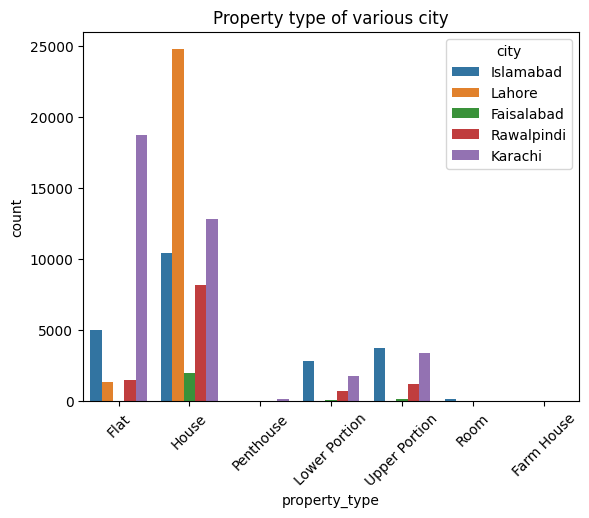

In [14]:
sns.countplot(x=df["property_type"],data=df,hue="city")
plt.title("Property type of various city")
plt.xticks(rotation=45)
plt.show()

In [30]:
location=df["location"].unique()
print(f"how many unique location in databse ={location}")

how many unique location in databse =['G-10' 'E-11' 'G-15' ... 'Defence Fort' 'Sihala Valley'
 'Shahra-e-Liaquat']


In [4]:
rent=df[df["purpose"]=="For Rent"]
sale=df[df["purpose"]=="For Sale"]

In [5]:
flat=sale.loc[sale["property_type"]=="Flat",["city","price"]]
flat.head(2)

,city,price
0,Islamabad,10000000
1,Islamabad,6900000


In [12]:
#How many Type of property Different Cities in Pakistan For Sale ?

In [6]:
flat_price=flat.groupby("city")["price"].median()
flatx=flat_price.index
flaty=flat_price.values

house=sale.loc[sale["property_type"]=="House",["city","price"]]
house_price=house.groupby("city")["price"].median()
housex=house_price.index
housey=house_price.values

Penthouse=sale.loc[sale["property_type"]=="Penthouse",["city","price"]]
Penthouse_price=Penthouse.groupby("city")["price"].median()
penthousex=Penthouse_price.index
penthousey=Penthouse_price.values

Lower_Portion=sale.loc[sale["property_type"]=="Lower Portion",["city","price"]]
Lower_Portion_price=Lower_Portion.groupby("city")["price"].median()
lowerportionx=Lower_Portion_price.index
lowerportiony=Lower_Portion_price.values

Upper_Portion=sale.loc[sale["property_type"]=="Upper Portion",["city","price"]]
Upper_Portion_price=Upper_Portion.groupby("city")["price"].median()
upperportionx=Upper_Portion_price.index
upperportiony=Upper_Portion_price.values

Room=sale.loc[sale["property_type"]=="Room",["city","price"]]
Room=Room.groupby("city")["price"].median()
roomx=Room.index
roomy=Room.values

Farm_House=sale.loc[sale["property_type"]=="Farm House",["city","price"]]
Farm_House=Farm_House.groupby("city")["price"].median()
farmhousex=Farm_House.index
farmhousey=Farm_House.values

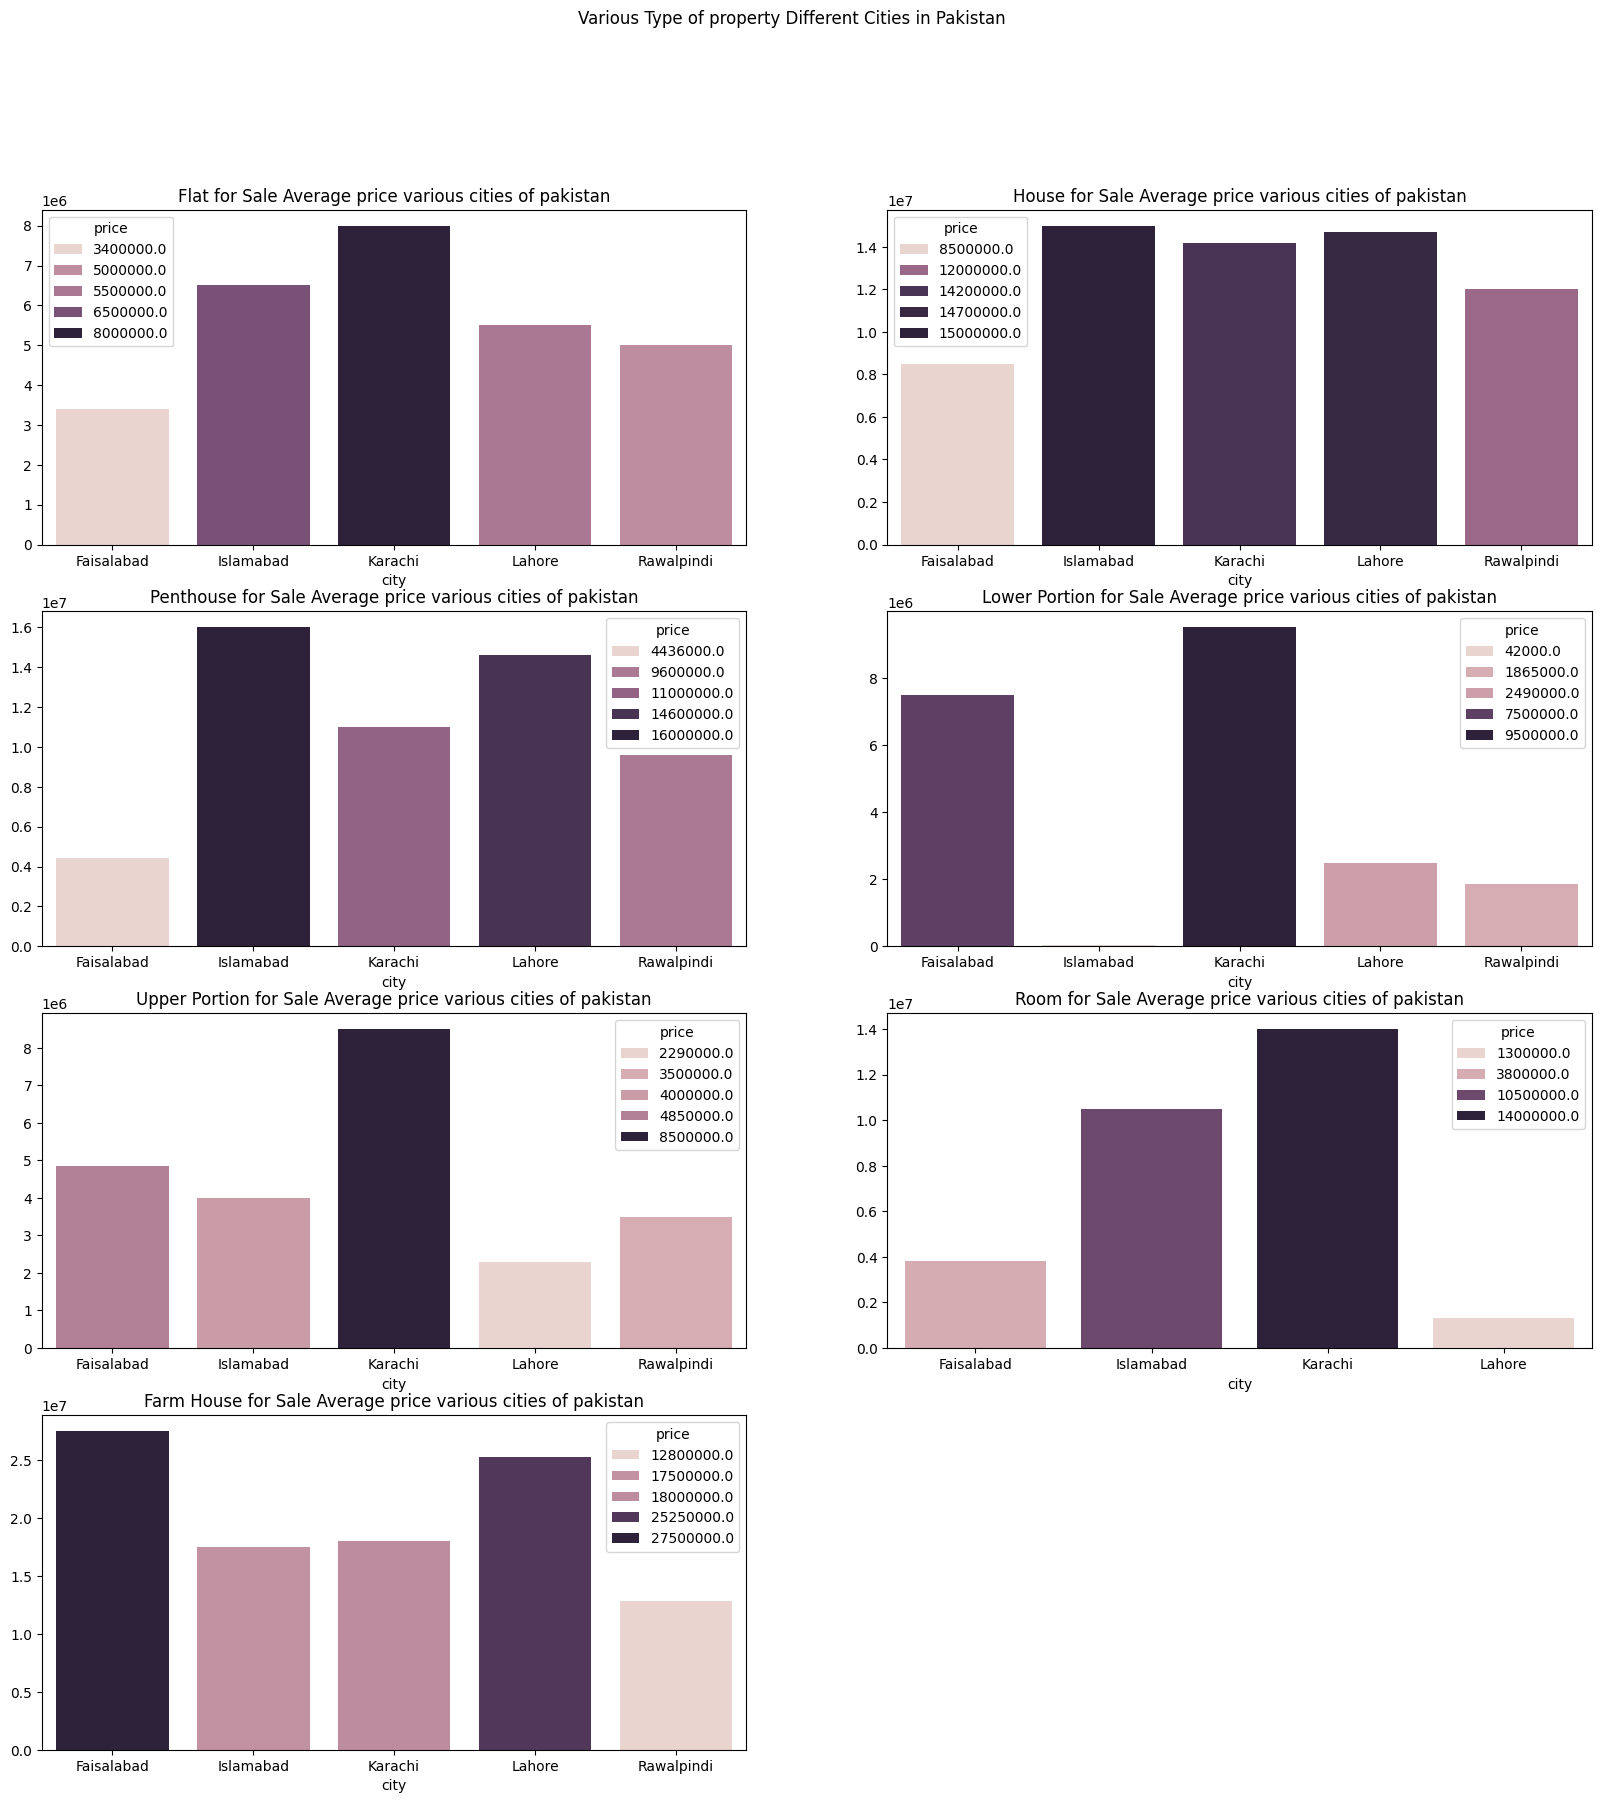

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.barplot(x=flatx,y=flaty,hue=flat_price)
plt.title("Flat for Sale Average price various cities of pakistan")


plt.subplot(4,2,2)
sns.barplot(x=housex,y=housey,hue=house_price)
plt.title("House for Sale Average price various cities of pakistan")


plt.subplot(4,2,3)
sns.barplot(x=penthousex,y=penthousey,hue=Penthouse_price)
plt.title("Penthouse for Sale Average price various cities of pakistan")


plt.subplot(4,2,4)
sns.barplot(x=lowerportionx,y=lowerportiony,hue=Lower_Portion_price)
plt.title("Lower Portion for Sale Average price various cities of pakistan")


plt.subplot(4,2,5)
sns.barplot(x=upperportionx,y=upperportiony,hue=Upper_Portion_price)
plt.title("Upper Portion for Sale Average price various cities of pakistan")


plt.subplot(4,2,6)
sns.barplot(x=roomx,y=roomy,hue=Room)
plt.title("Room for Sale Average price various cities of pakistan")

plt.subplot(4,2,7)
sns.barplot(x=farmhousex,y=farmhousey,hue=Farm_House)
plt.title("Farm House for Sale Average price various cities of pakistan")


plt.suptitle("Various Type of property Different Cities in Pakistan")
plt.show()

In [107]:
#we see above the graph highest flat price city is karachi.
#highest house and penthouse price city is islamabad.
#highest Upper portion,Lower Portion and room price city is Karachi.
#highest farm house price city is Faisalabad.

In [13]:
#How many Type of property Different Cities in Pakistan For Rent ?

In [14]:
flat_rent=rent.loc[rent["property_type"]=="Flat",["city","price"]]
flat_rent.head(2)

,city,price
0,Islamabad,10000000
1,Islamabad,6900000


In [15]:
flat_price_rent=flat_rent.groupby("city")["price"].median()
flat_=flat_price_rent.index
flat_y=flat_price_rent.values

house_rent=rent.loc[rent["property_type"]=="House",["city","price"]]
house_price_rent=house_rent.groupby("city")["price"].median()
house_x=house_price_rent.index
house_y=house_price_rent.values

penthouse_rent=rent.loc[rent["property_type"]=="House",["city","price"]]
penthouse_price_rent=penthouse_rent.groupby("city")["price"].median()
penthouse_x=penthouse_price_rent.index
penthouse_y=penthouse_price_rent.values

lower_rent=rent.loc[rent["property_type"]=="House",["city","price"]]
lower_price_rent=lower_rent.groupby("city")["price"].median()
lower_x=lower_price_rent.index
lower_y=lower_price_rent.values

upper_rent=rent.loc[rent["property_type"]=="House",["city","price"]]
upper_price_rent=upper_rent.groupby("city")["price"].median()
upper_x=upper_price_rent.index
upper_y=upper_price_rent.values

room_rent=rent.loc[rent["property_type"]=="House",["city","price"]]
room_price_rent=room_rent.groupby("city")["price"].median()
room_x=room_price_rent.index
room_y=room_price_rent.values

farm_rent=rent.loc[rent["property_type"]=="House",["city","price"]]
farm_price_rent=farm_rent.groupby("city")["price"].median()
farm_x=farm_price_rent.index
farm_y=farm_price_rent.values

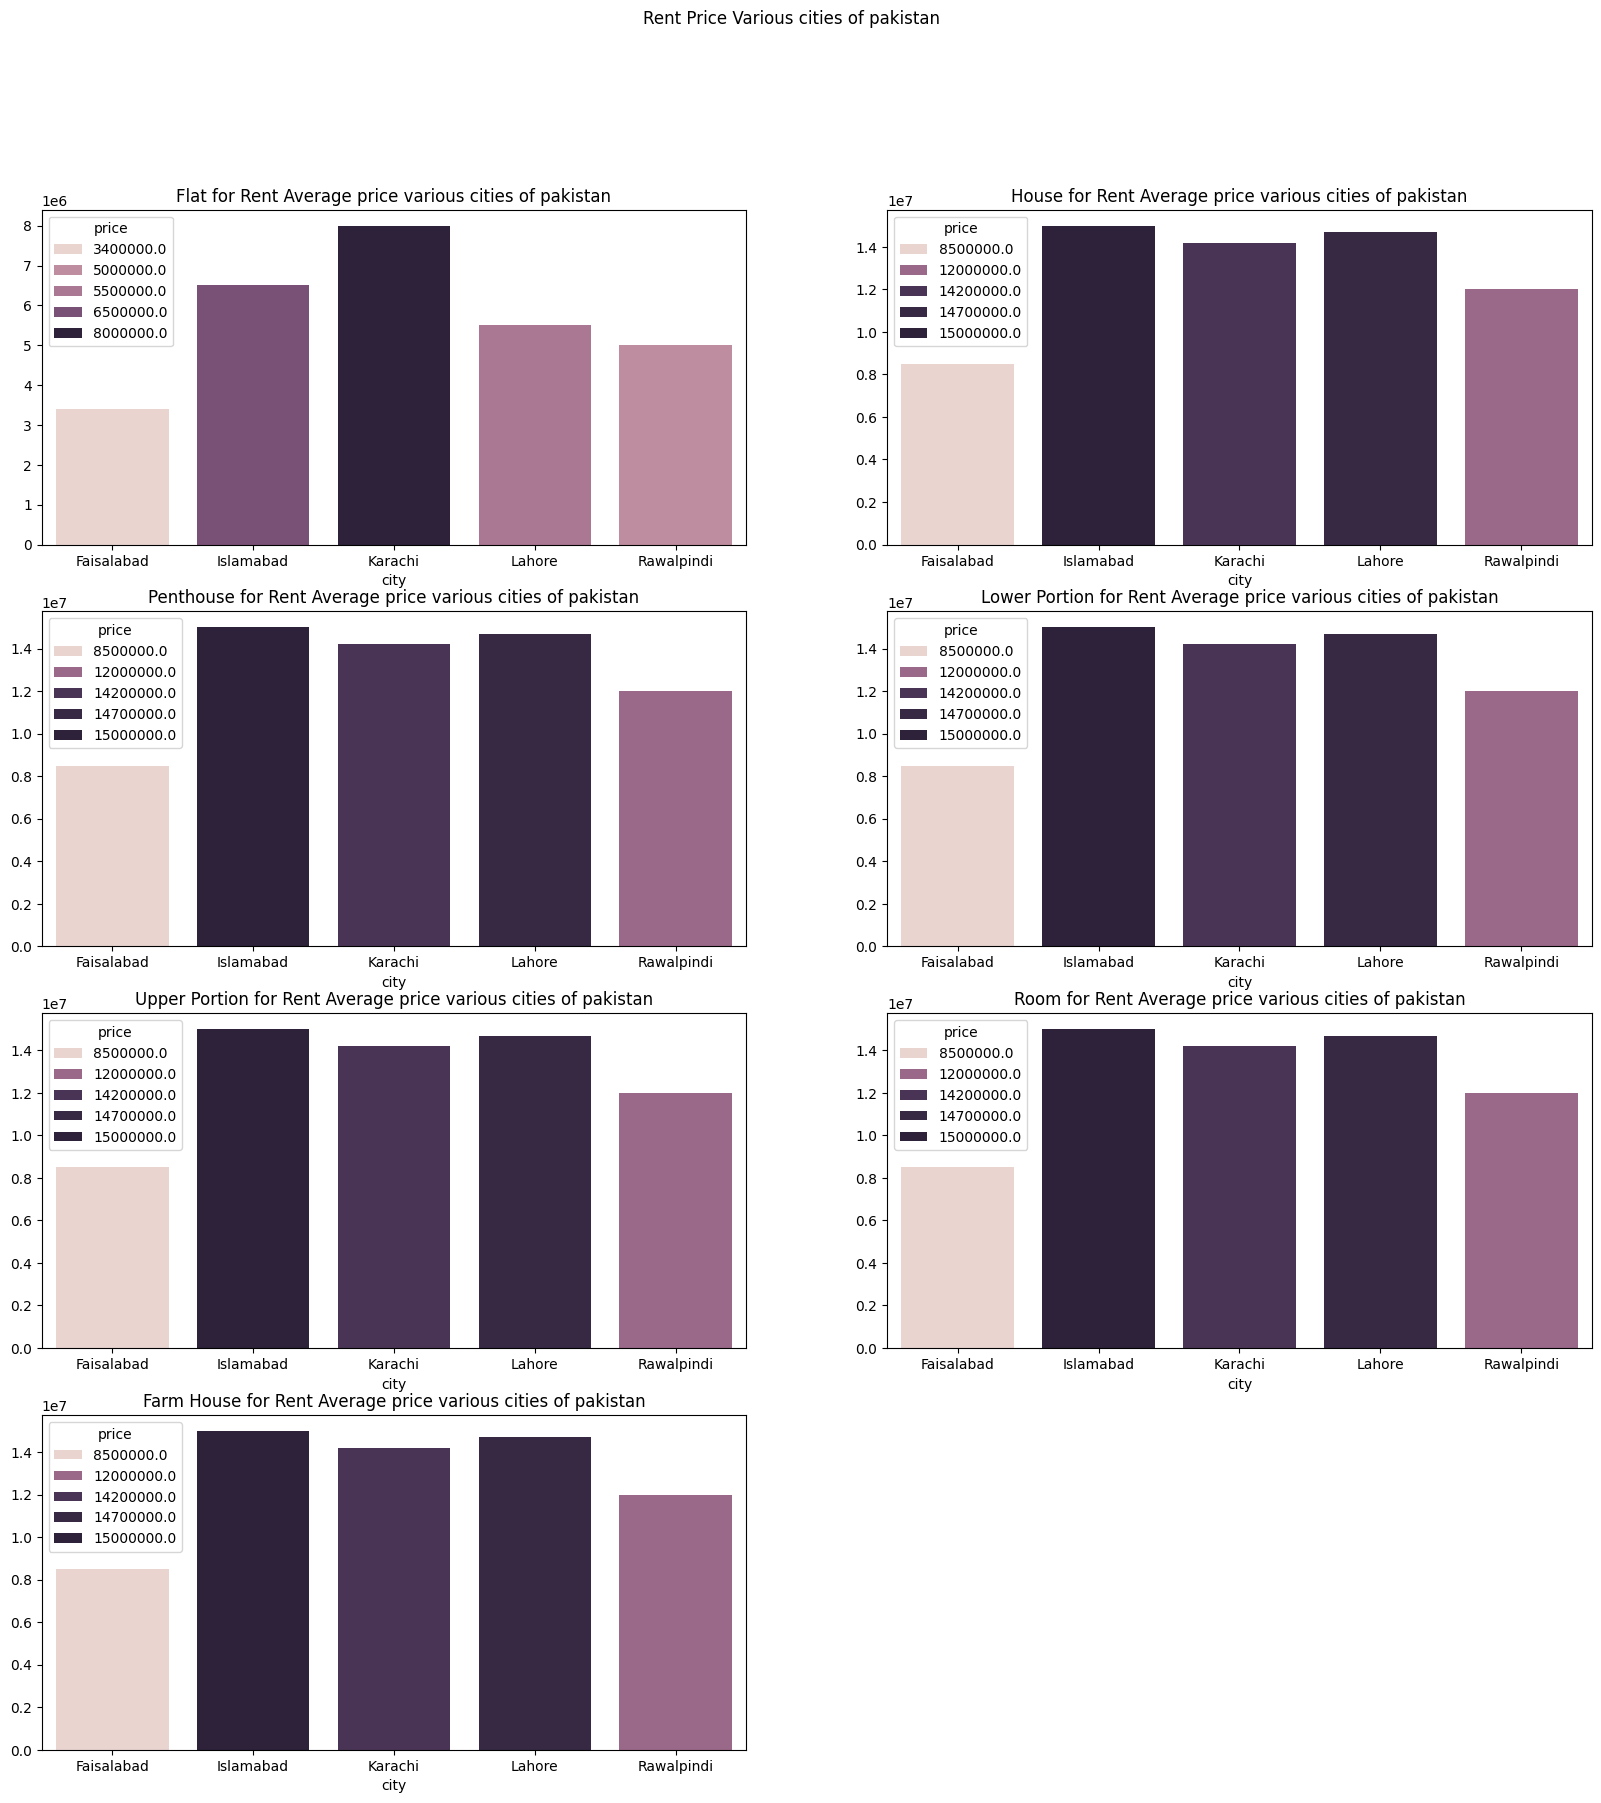

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.barplot(x=flat_,y=flat_y,hue=flat_price_rent)
plt.title("Flat for Rent Average price various cities of pakistan")


plt.subplot(4,2,2)
sns.barplot(x=house_x,y=house_y,hue=house_price_rent)
plt.title("House for Rent Average price various cities of pakistan")


plt.subplot(4,2,3)
sns.barplot(x=penthouse_x,y=penthouse_y,hue=penthouse_price_rent)
plt.title("Penthouse for Rent Average price various cities of pakistan")


plt.subplot(4,2,4)
sns.barplot(x=lower_x,y=lower_y,hue=lower_price_rent)
plt.title("Lower Portion for Rent Average price various cities of pakistan")


plt.subplot(4,2,5)
sns.barplot(x=upper_x,y=upper_y,hue=upper_price_rent)
plt.title("Upper Portion for Rent Average price various cities of pakistan")


plt.subplot(4,2,6)
sns.barplot(x=room_x,y=room_y,hue=room_price_rent)
plt.title("Room for Rent Average price various cities of pakistan")

plt.subplot(4,2,7)
sns.barplot(x=farm_x,y=farm_y,hue=farm_price_rent)
plt.title("Farm House for Rent Average price various cities of pakistan")


plt.suptitle("Rent Price Various cities of pakistan")
plt.show()

In [115]:
#we see above the graph highest property rent price citi is islamabad in pakistan.

In [21]:
#Property price different location in islamabad.

In [22]:
city=df[df["city"]=="Islamabad"]
city_flat=city[city["property_type"]=="Flat"]
Islamabad_flat=city_flat.groupby("location")["price"].max().sort_values(ascending=False).head(10)
x=Islamabad_flat.index
y=Islamabad_flat.values

city_flat_house=city[city["property_type"]=="House"]
Islamabad_flat_house=city_flat_house.groupby("location")["price"].max().sort_values(ascending=False).head(10)
housex=Islamabad_flat_house.index
housey=Islamabad_flat_house.values

city_flat_Penthouse=city[city["property_type"]=="Penthouse"]
Islamabad_flat_Penthouse=city_flat_Penthouse.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Penthousex=Islamabad_flat_Penthouse.index
Penthousey=Islamabad_flat_Penthouse.values

city_flat_Lower=city[city["property_type"]=="Lower Portion"]
Islamabad_flat_Lower=city_flat_Lower.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Lowerx=Islamabad_flat_Lower.index
Lowery=Islamabad_flat_Lower.values

city_flat_Upper=city[city["property_type"]=="Upper Portion"]
Islamabad_flat_Upper=city_flat_Upper.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Upperx=Islamabad_flat_Upper.index
Uppery=Islamabad_flat_Upper.values

city_flat_Room=city[city["property_type"]=="Room"]
Islamabad_flat_Room=city_flat_Room.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Roomx=Islamabad_flat_Room.index
Roomy=Islamabad_flat_Room.values

city_Farm_House=city[city["property_type"]=="Farm House"]
Islamabad_Farm_House=city_Farm_House.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Farm_Housex=Islamabad_Farm_House.index
Farm_Housey=Islamabad_Farm_House.values

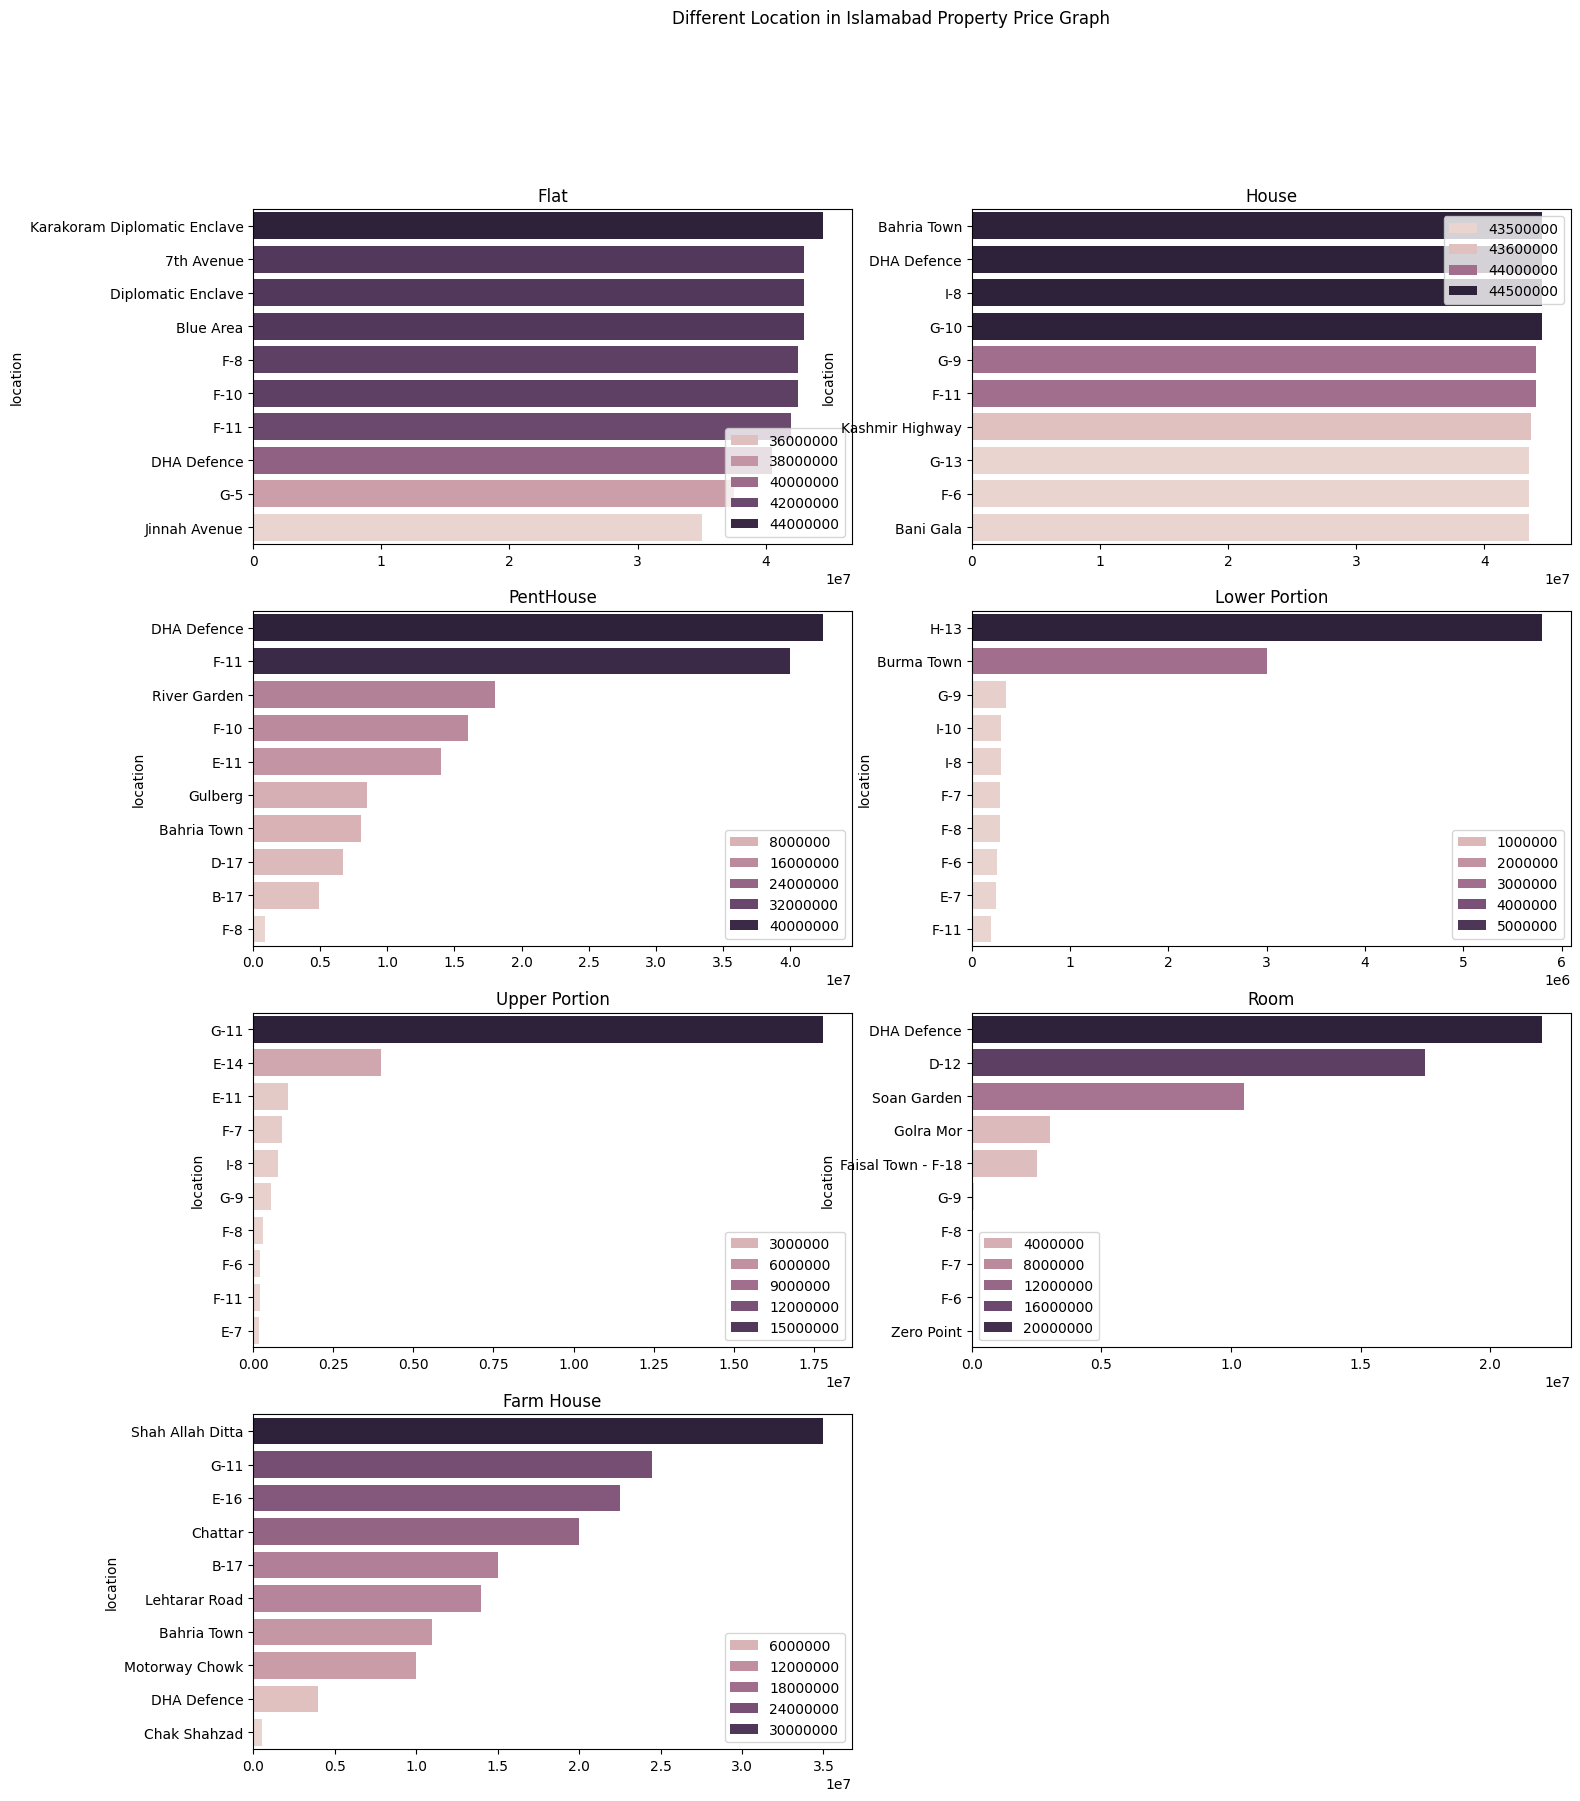

In [26]:
plt.figure(figsize=(17,20))
plt.subplot(4,2,1)
sns.barplot(x=y,y=x,hue=Islamabad_flat.values)
plt.title("Flat")

plt.subplot(4,2,2)
sns.barplot(x=housey,y=housex,hue=Islamabad_flat_house.values)
plt.title("House")

plt.subplot(4,2,3)
sns.barplot(x=Penthousey,y=Penthousex,hue=Islamabad_flat_Penthouse.values)
plt.title("PentHouse")

plt.subplot(4,2,4)
sns.barplot(x=Lowery,y=Lowerx,hue=Islamabad_flat_Lower.values)
plt.title("Lower Portion")

plt.subplot(4,2,5)
sns.barplot(x=Uppery,y=Upperx,hue=Islamabad_flat_Upper.values)
plt.title("Upper Portion")

plt.subplot(4,2,6)
sns.barplot(x=Roomy,y=Roomx,hue=Islamabad_flat_Room.values)
plt.title("Room")

plt.subplot(4,2,7)
sns.barplot(x=Farm_Housey,y=Farm_Housex,hue=Islamabad_Farm_House.values)
plt.title("Farm House")

plt.suptitle("Different Location in Islamabad Property Price Graph")
plt.show()

In [27]:
#Property price different location in lahore.

In [28]:
city=df[df["city"]=="Lahore"]
city_flat=city[city["property_type"]=="Flat"]
flat=city_flat.groupby("location")["price"].max().sort_values(ascending=False).head(10)
x=flat.index
y=flat.values

city_flat_house=city[city["property_type"]=="House"]
flat_house=city_flat_house.groupby("location")["price"].max().sort_values(ascending=False).head(10)
housex=flat_house.index
housey=flat_house.values

city_flat_Penthouse=city[city["property_type"]=="Penthouse"]
flat_Penthouse=city_flat_Penthouse.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Penthousex=flat_Penthouse.index
Penthousey=flat_Penthouse.values

city_flat_Lower=city[city["property_type"]=="Lower Portion"]
flat_Lower=city_flat_Lower.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Lowerx=flat_Lower.index
Lowery=flat_Lower.values

city_flat_Upper=city[city["property_type"]=="Upper Portion"]
flat_Upper=city_flat_Upper.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Upperx=flat_Upper.index
Uppery=flat_Upper.values

city_flat_Room=city[city["property_type"]=="Room"]
flat_Room=city_flat_Room.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Roomx=flat_Room.index
Roomy=flat_Room.values

city_Farm_House=city[city["property_type"]=="Farm House"]
Farm_House=city_Farm_House.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Farm_Housex=Farm_House.index
Farm_Housey=Farm_House.values

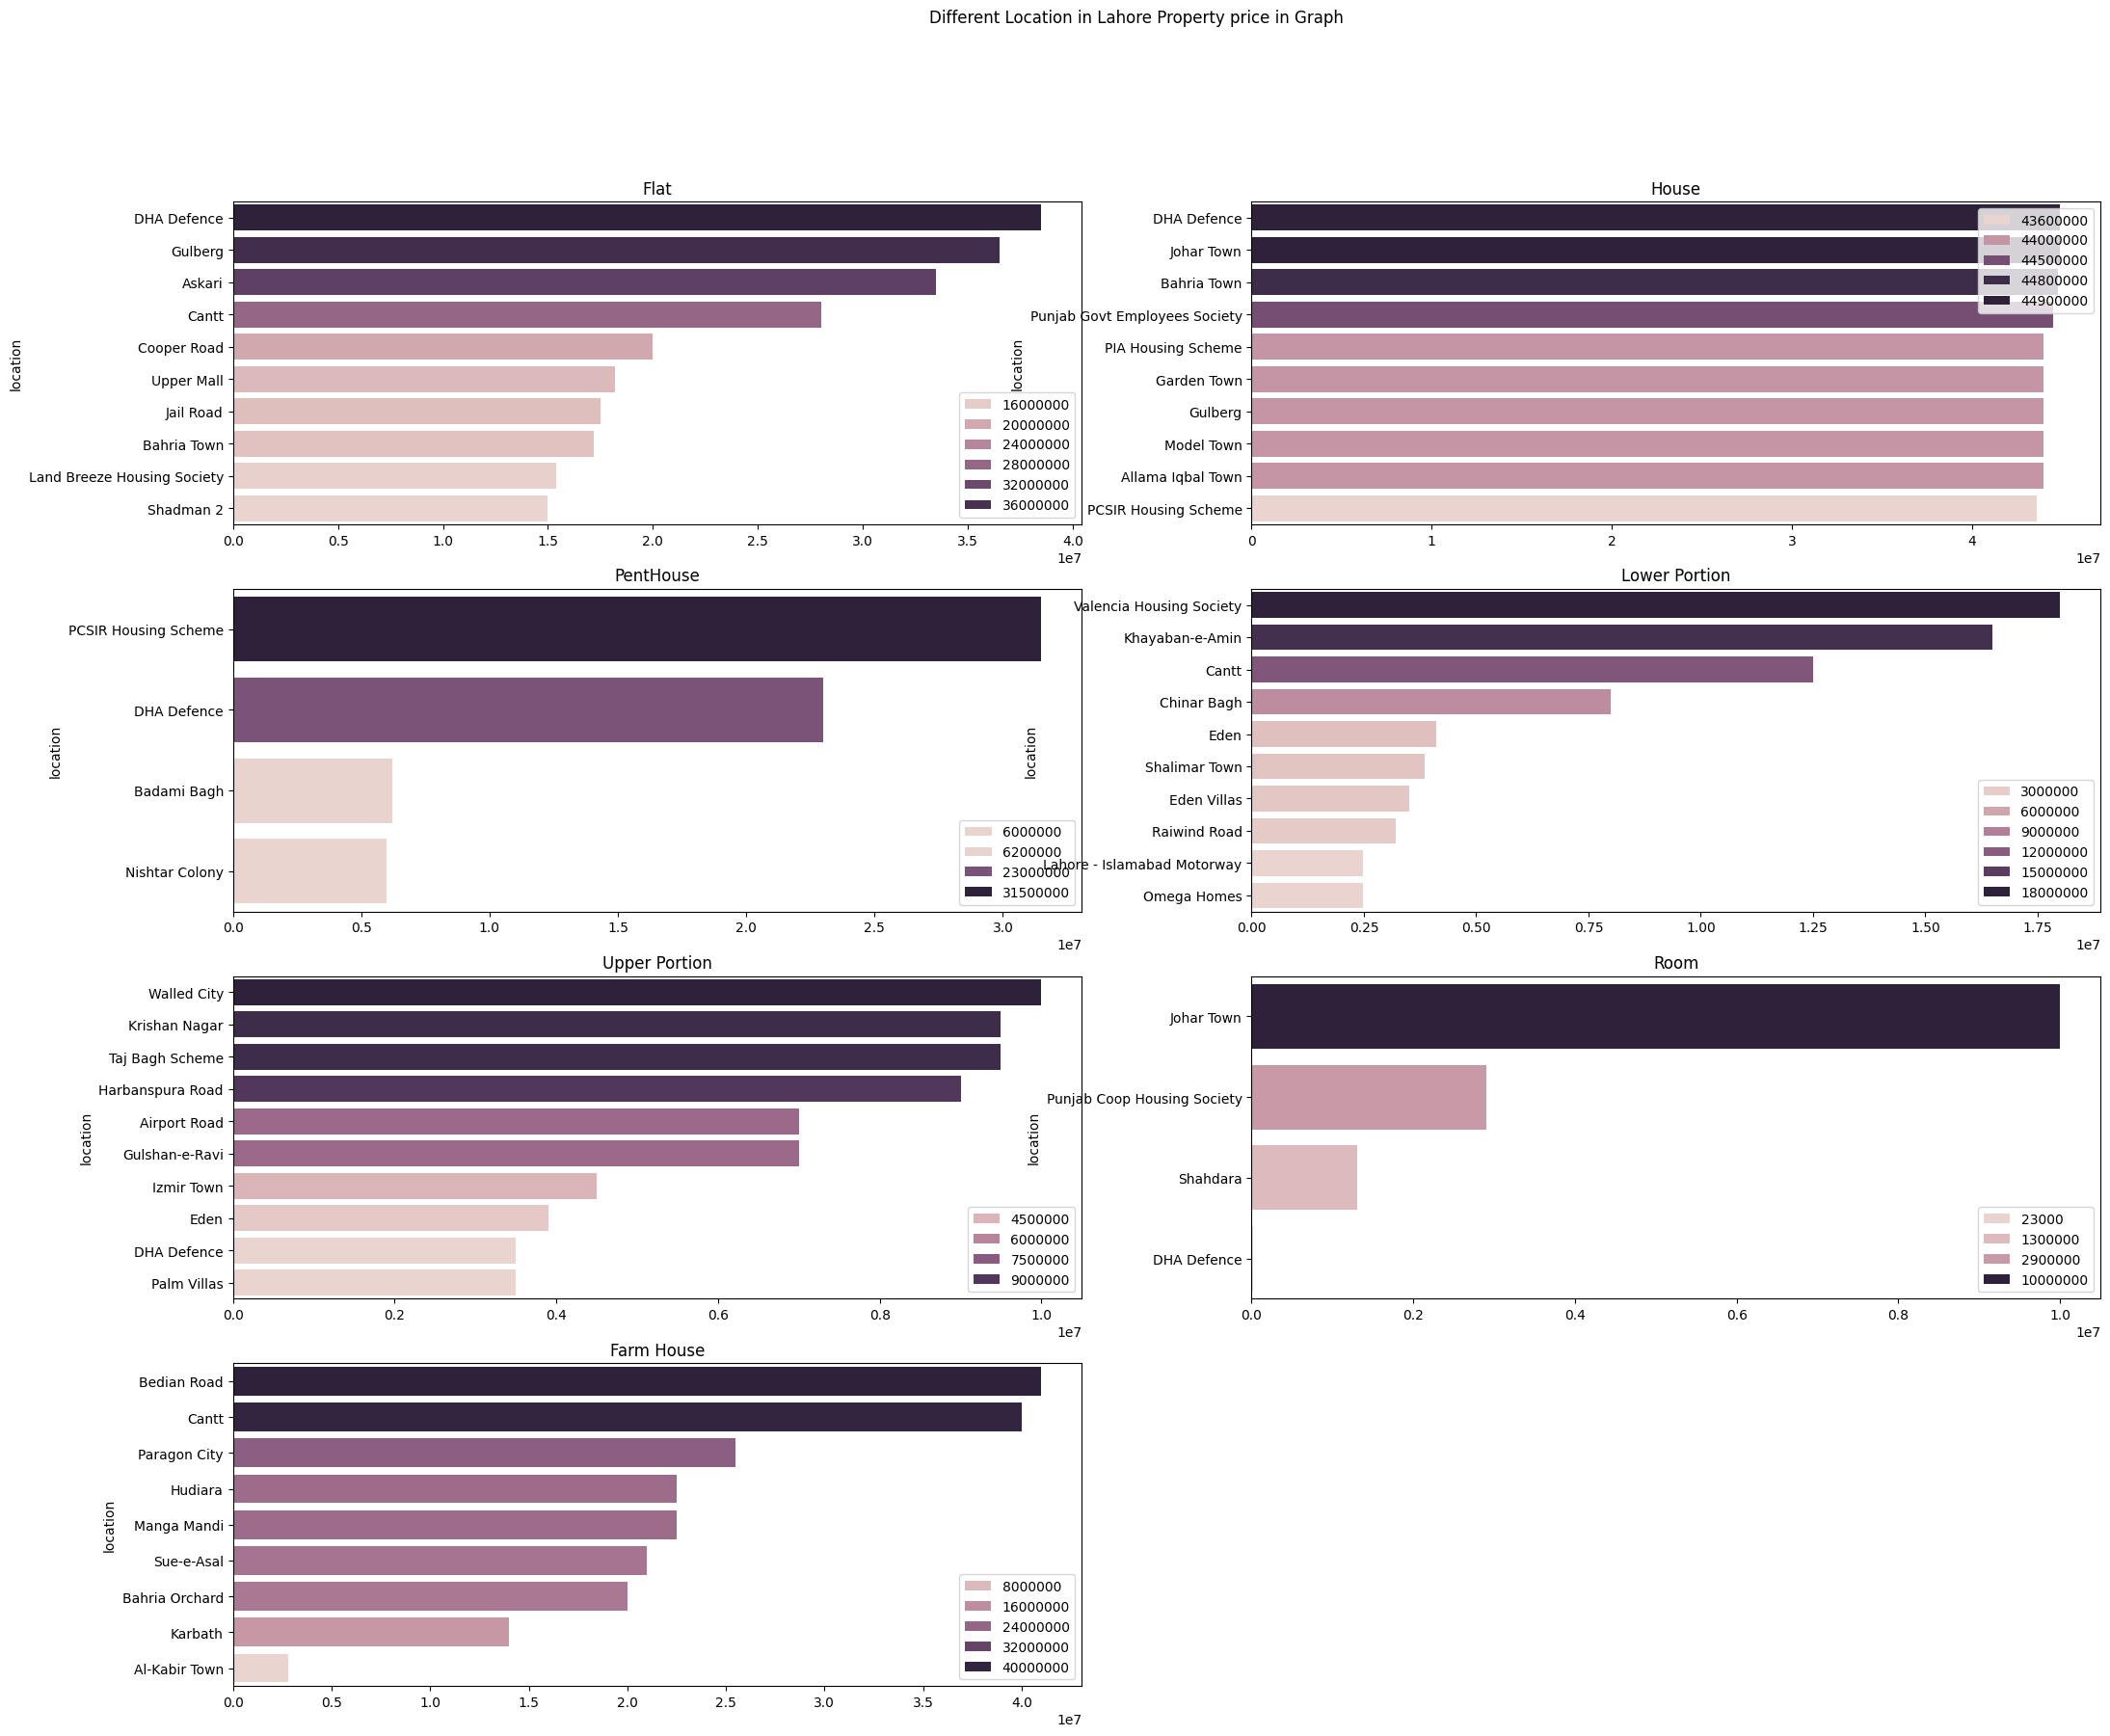

In [36]:
plt.figure(figsize=(25,20))
plt.subplot(4,2,1)
sns.barplot(x=y,y=x,hue=flat.values)
plt.title("Flat")

plt.subplot(4,2,2)
sns.barplot(x=housey,y=housex,hue=flat_house.values)
plt.title("House")

plt.subplot(4,2,3)
sns.barplot(x=Penthousey,y=Penthousex,hue=flat_Penthouse.values)
plt.title("PentHouse")

plt.subplot(4,2,4)
sns.barplot(x=Lowery,y=Lowerx,hue=flat_Lower.values)
plt.title("Lower Portion")

plt.subplot(4,2,5)
sns.barplot(x=Uppery,y=Upperx,hue=flat_Upper.values)
plt.title("Upper Portion")

plt.subplot(4,2,6)
sns.barplot(x=Roomy,y=Roomx,hue=flat_Room.values)
plt.title("Room")

plt.subplot(4,2,7)
sns.barplot(x=Farm_Housey,y=Farm_Housex,hue=Farm_House.values)
plt.title("Farm House")

plt.suptitle("Different Location in Lahore Property price in Graph")
plt.show()

In [90]:
city=df[df["city"]=="Faisalabad"]
city_flat=city[city["property_type"]=="Flat"]
flat=city_flat.groupby("location")["price"].max().sort_values(ascending=False).head(10)
x=flat.index
y=flat.values

city_flat_house=city[city["property_type"]=="House"]
flat_house=city_flat_house.groupby("location")["price"].max().sort_values(ascending=False).head(10)
housex=flat_house.index
housey=flat_house.values

city_flat_Penthouse=city[city["property_type"]=="Penthouse"]
flat_Penthouse=city_flat_Penthouse.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Penthousex=flat_Penthouse.index
Penthousey=flat_Penthouse.values

city_flat_Lower=city[city["property_type"]=="Lower Portion"]
flat_Lower=city_flat_Lower.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Lowerx=flat_Lower.index
Lowery=flat_Lower.values

city_flat_Upper=city[city["property_type"]=="Upper Portion"]
flat_Upper=city_flat_Upper.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Upperx=flat_Upper.index
Uppery=flat_Upper.values

city_flat_Room=city[city["property_type"]=="Room"]
flat_Room=city_flat_Room.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Roomx=flat_Room.index
Roomy=flat_Room.values

city_Farm_House=city[city["property_type"]=="Farm House"]
Farm_House=city_Farm_House.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Farm_Housex=Farm_House.index
Farm_Housey=Farm_House.values

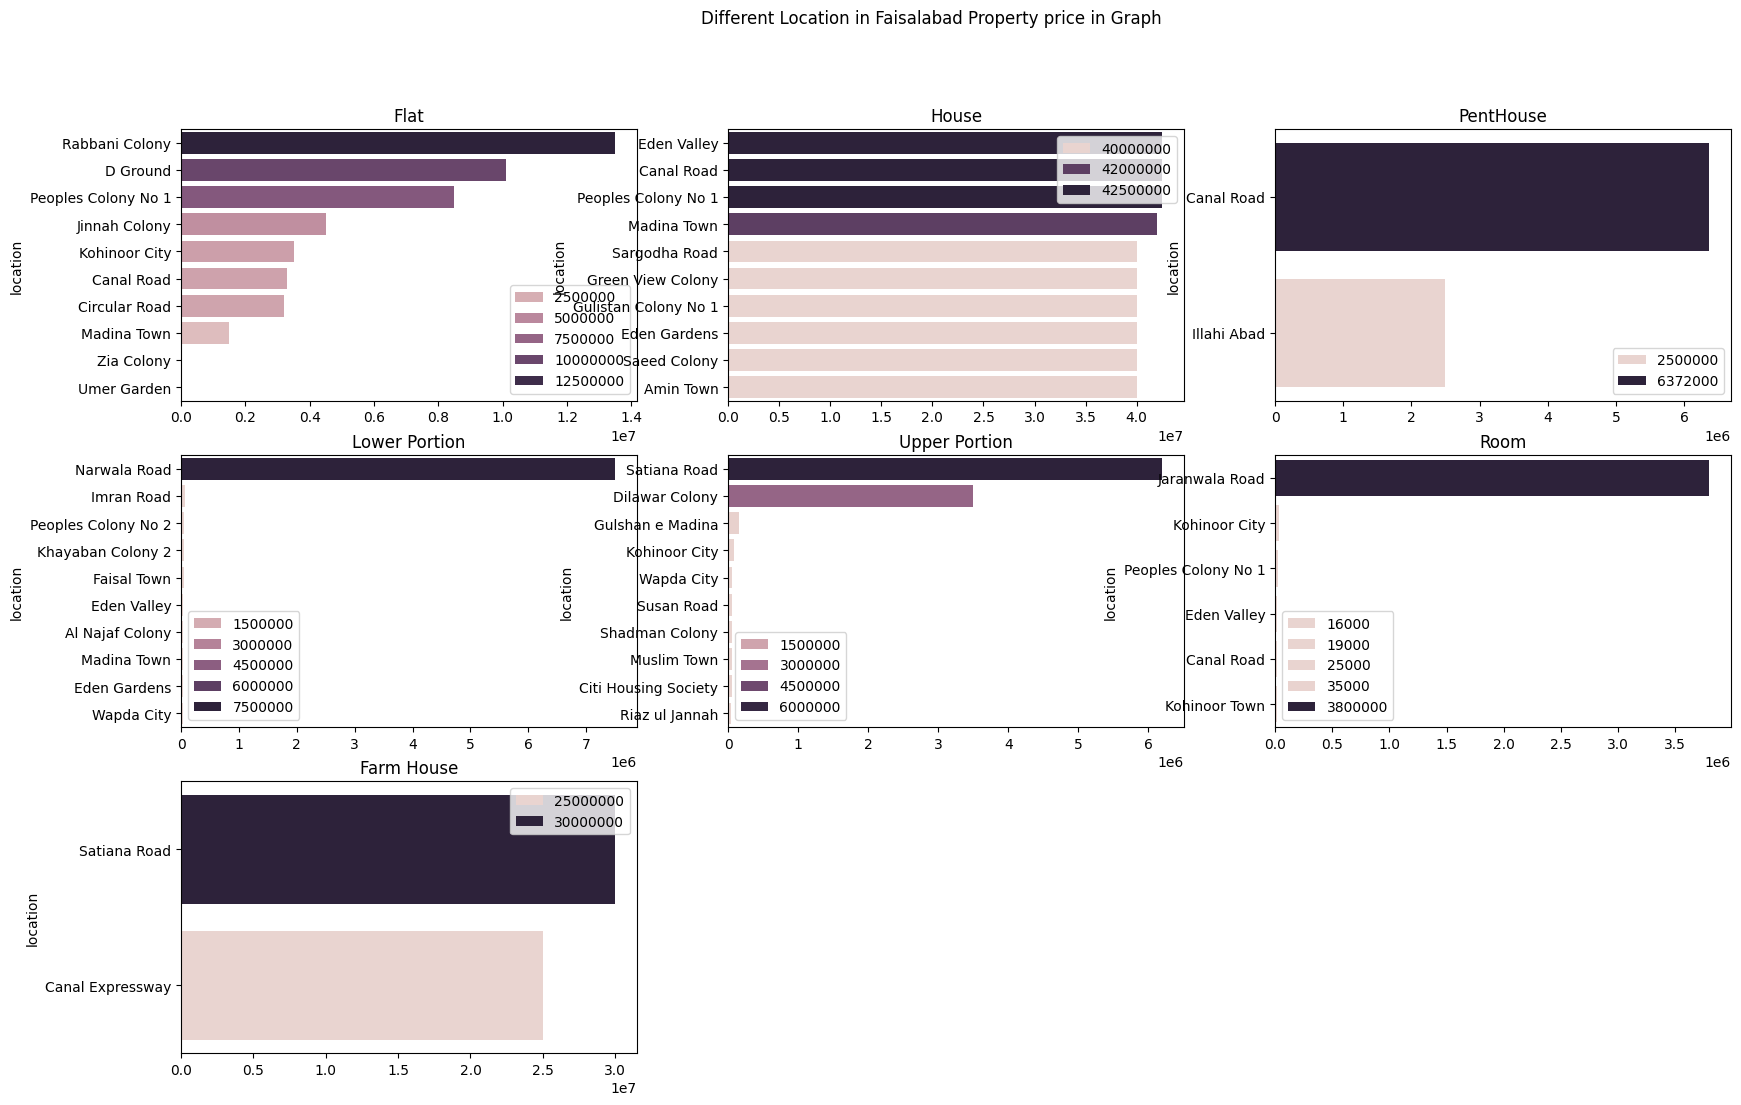

In [91]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.barplot(x=y,y=x,hue=flat.values)
plt.title("Flat")

plt.subplot(3,3,2)
sns.barplot(x=housey,y=housex,hue=flat_house.values)
plt.title("House")

plt.subplot(3,3,3)
sns.barplot(x=Penthousey,y=Penthousex,hue=flat_Penthouse.values)
plt.title("PentHouse")

plt.subplot(3,3,4)
sns.barplot(x=Lowery,y=Lowerx,hue=flat_Lower.values)
plt.title("Lower Portion")

plt.subplot(3,3,5)
sns.barplot(x=Uppery,y=Upperx,hue=flat_Upper.values)
plt.title("Upper Portion")

plt.subplot(3,3,6)
sns.barplot(x=Roomy,y=Roomx,hue=flat_Room.values)
plt.title("Room")

plt.subplot(3,3,7)
sns.barplot(x=Farm_Housey,y=Farm_Housex,hue=Farm_House.values)
plt.title("Farm House")

plt.suptitle("Different Location in Faisalabad Property price in Graph")
plt.show()

In [92]:
city=df[df["city"]=="Rawalpindi"]
city_flat=city[city["property_type"]=="Flat"]
flat=city_flat.groupby("location")["price"].max().sort_values(ascending=False).head(10)
x=flat.index
y=flat.values

city_flat_house=city[city["property_type"]=="House"]
flat_house=city_flat_house.groupby("location")["price"].max().sort_values(ascending=False).head(10)
housex=flat_house.index
housey=flat_house.values

city_flat_Penthouse=city[city["property_type"]=="Penthouse"]
flat_Penthouse=city_flat_Penthouse.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Penthousex=flat_Penthouse.index
Penthousey=flat_Penthouse.values

city_flat_Lower=city[city["property_type"]=="Lower Portion"]
flat_Lower=city_flat_Lower.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Lowerx=flat_Lower.index
Lowery=flat_Lower.values

city_flat_Upper=city[city["property_type"]=="Upper Portion"]
flat_Upper=city_flat_Upper.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Upperx=flat_Upper.index
Uppery=flat_Upper.values

city_flat_Room=city[city["property_type"]=="Room"]
flat_Room=city_flat_Room.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Roomx=flat_Room.index
Roomy=flat_Room.values

city_Farm_House=city[city["property_type"]=="Farm House"]
Farm_House=city_Farm_House.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Farm_Housex=Farm_House.index
Farm_Housey=Farm_House.values

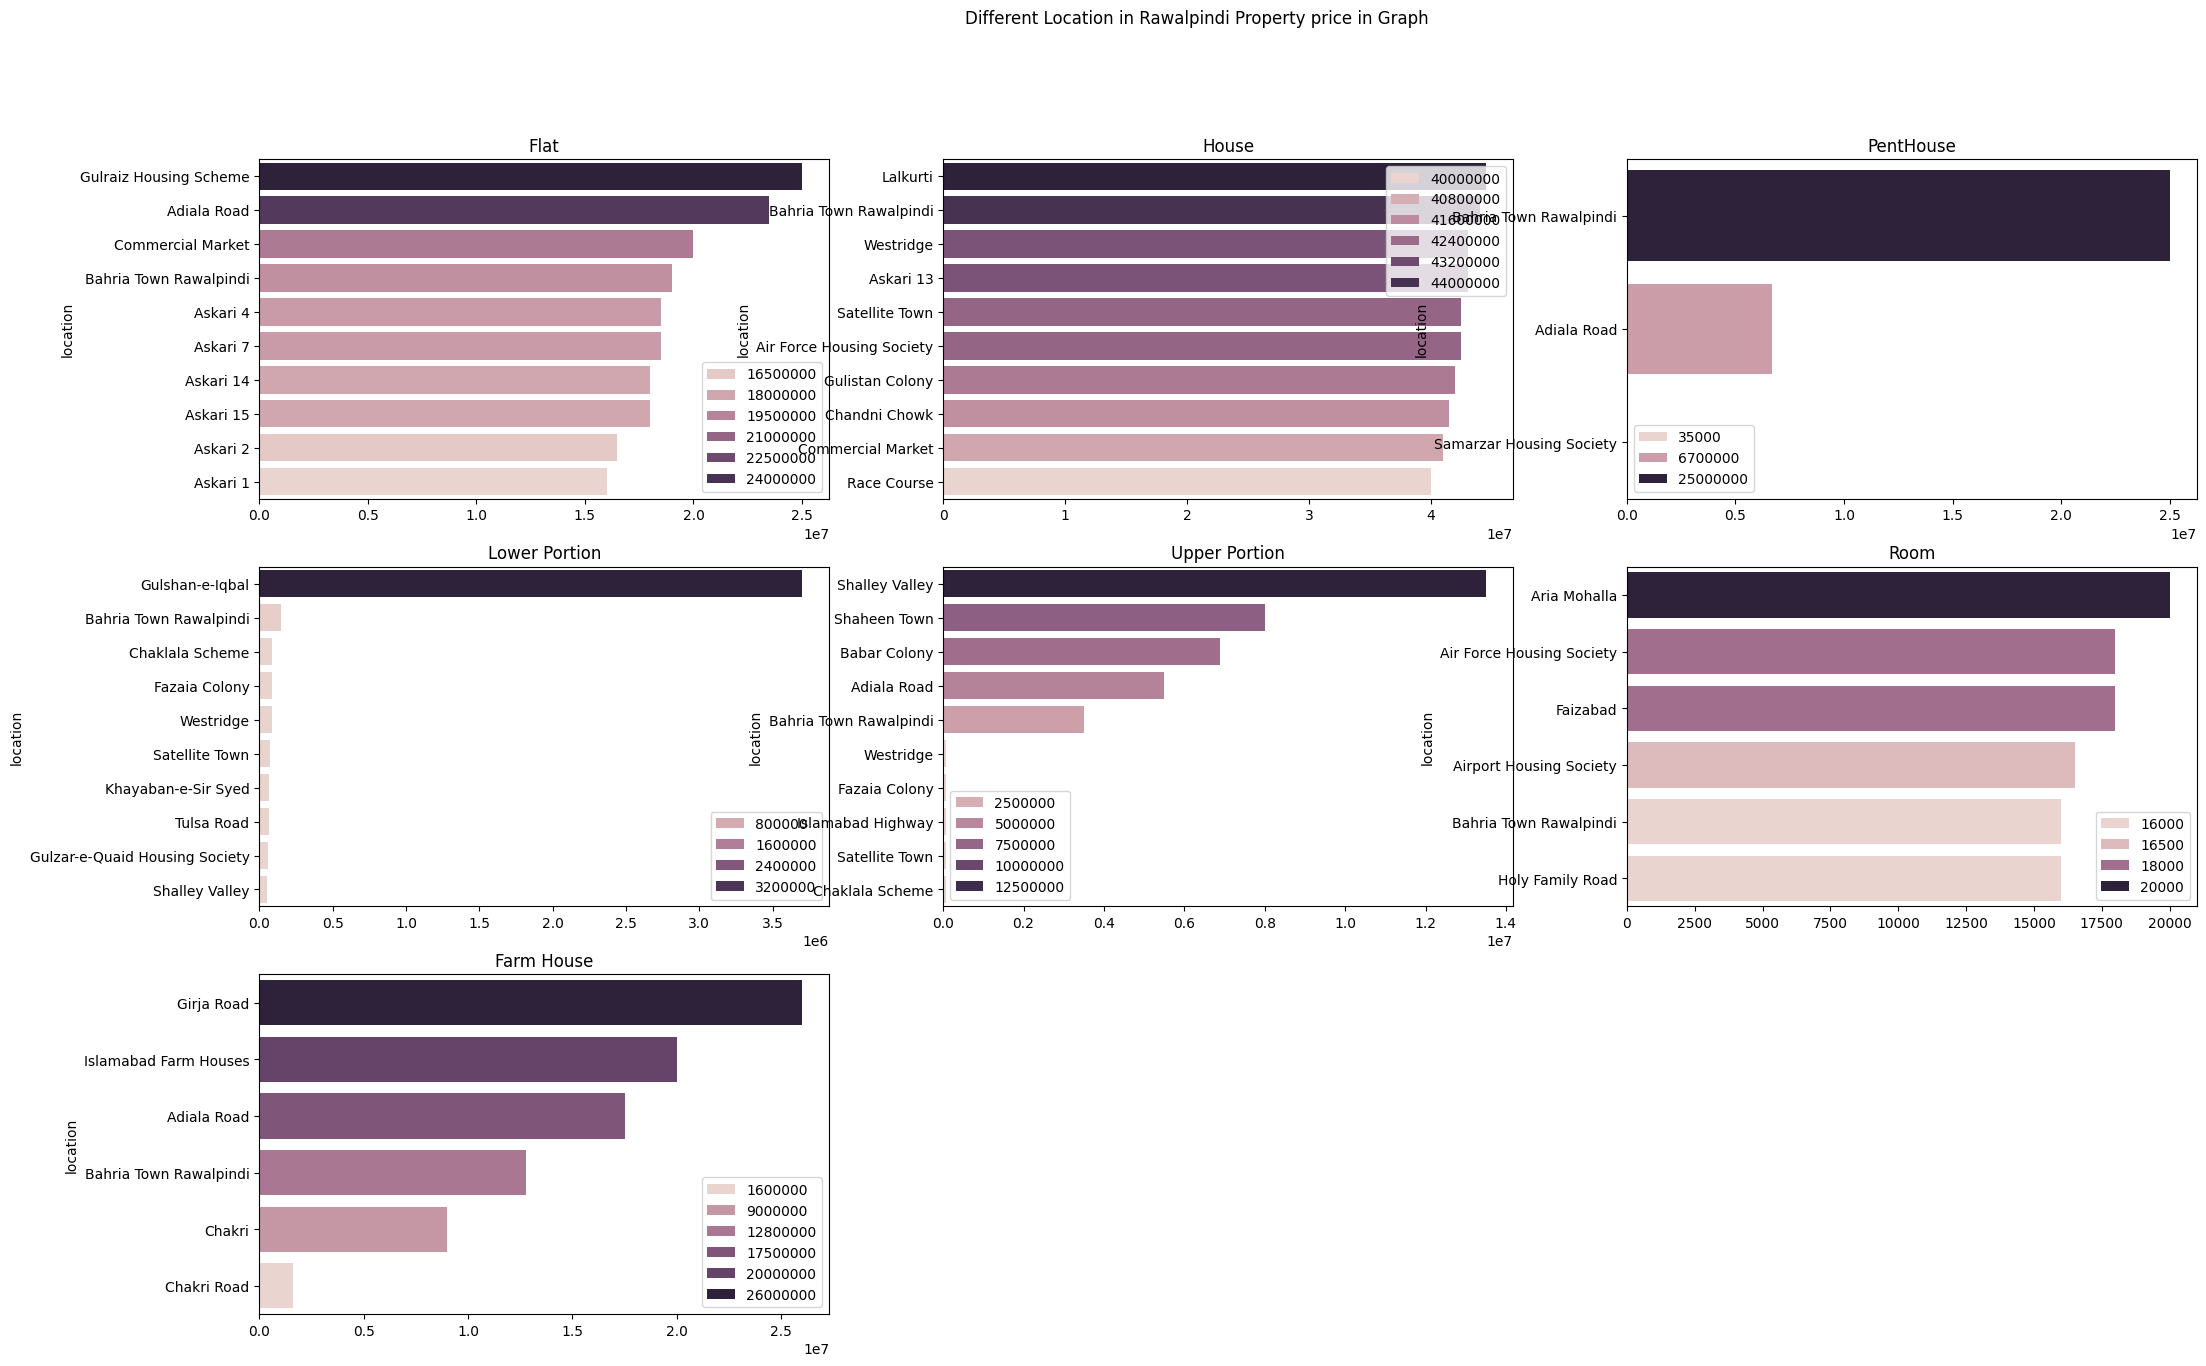

In [95]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.barplot(x=y,y=x,hue=flat.values)
plt.title("Flat")

plt.subplot(3,3,2)
sns.barplot(x=housey,y=housex,hue=flat_house.values)
plt.title("House")

plt.subplot(3,3,3)
sns.barplot(x=Penthousey,y=Penthousex,hue=flat_Penthouse.values)
plt.title("PentHouse")

plt.subplot(3,3,4)
sns.barplot(x=Lowery,y=Lowerx,hue=flat_Lower.values)
plt.title("Lower Portion")

plt.subplot(3,3,5)
sns.barplot(x=Uppery,y=Upperx,hue=flat_Upper.values)
plt.title("Upper Portion")

plt.subplot(3,3,6)
sns.barplot(x=Roomy,y=Roomx,hue=flat_Room.values)
plt.title("Room")

plt.subplot(3,3,7)
sns.barplot(x=Farm_Housey,y=Farm_Housex,hue=Farm_House.values)
plt.title("Farm House")

plt.suptitle("Different Location in Rawalpindi Property price in Graph")
plt.show()

In [99]:
city=df[df["city"]=="Karachi"]
city_flat=city[city["property_type"]=="Flat"]
flat=city_flat.groupby("location")["price"].max().sort_values(ascending=False).head(10)
x=flat.index
y=flat.values

city_flat_house=city[city["property_type"]=="House"]
flat_house=city_flat_house.groupby("location")["price"].max().sort_values(ascending=False).head(10)
housex=flat_house.index
housey=flat_house.values

city_flat_Penthouse=city[city["property_type"]=="Penthouse"]
flat_Penthouse=city_flat_Penthouse.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Penthousex=flat_Penthouse.index
Penthousey=flat_Penthouse.values

city_flat_Lower=city[city["property_type"]=="Lower Portion"]
flat_Lower=city_flat_Lower.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Lowerx=flat_Lower.index
Lowery=flat_Lower.values

city_flat_Upper=city[city["property_type"]=="Upper Portion"]
flat_Upper=city_flat_Upper.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Upperx=flat_Upper.index
Uppery=flat_Upper.values

city_flat_Room=city[city["property_type"]=="Room"]
flat_Room=city_flat_Room.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Roomx=flat_Room.index
Roomy=flat_Room.values

city_Farm_House=city[city["property_type"]=="Farm House"]
Farm_House=city_Farm_House.groupby("location")["price"].max().sort_values(ascending=False).head(10)
Farm_Housex=Farm_House.index
Farm_Housey=Farm_House.values

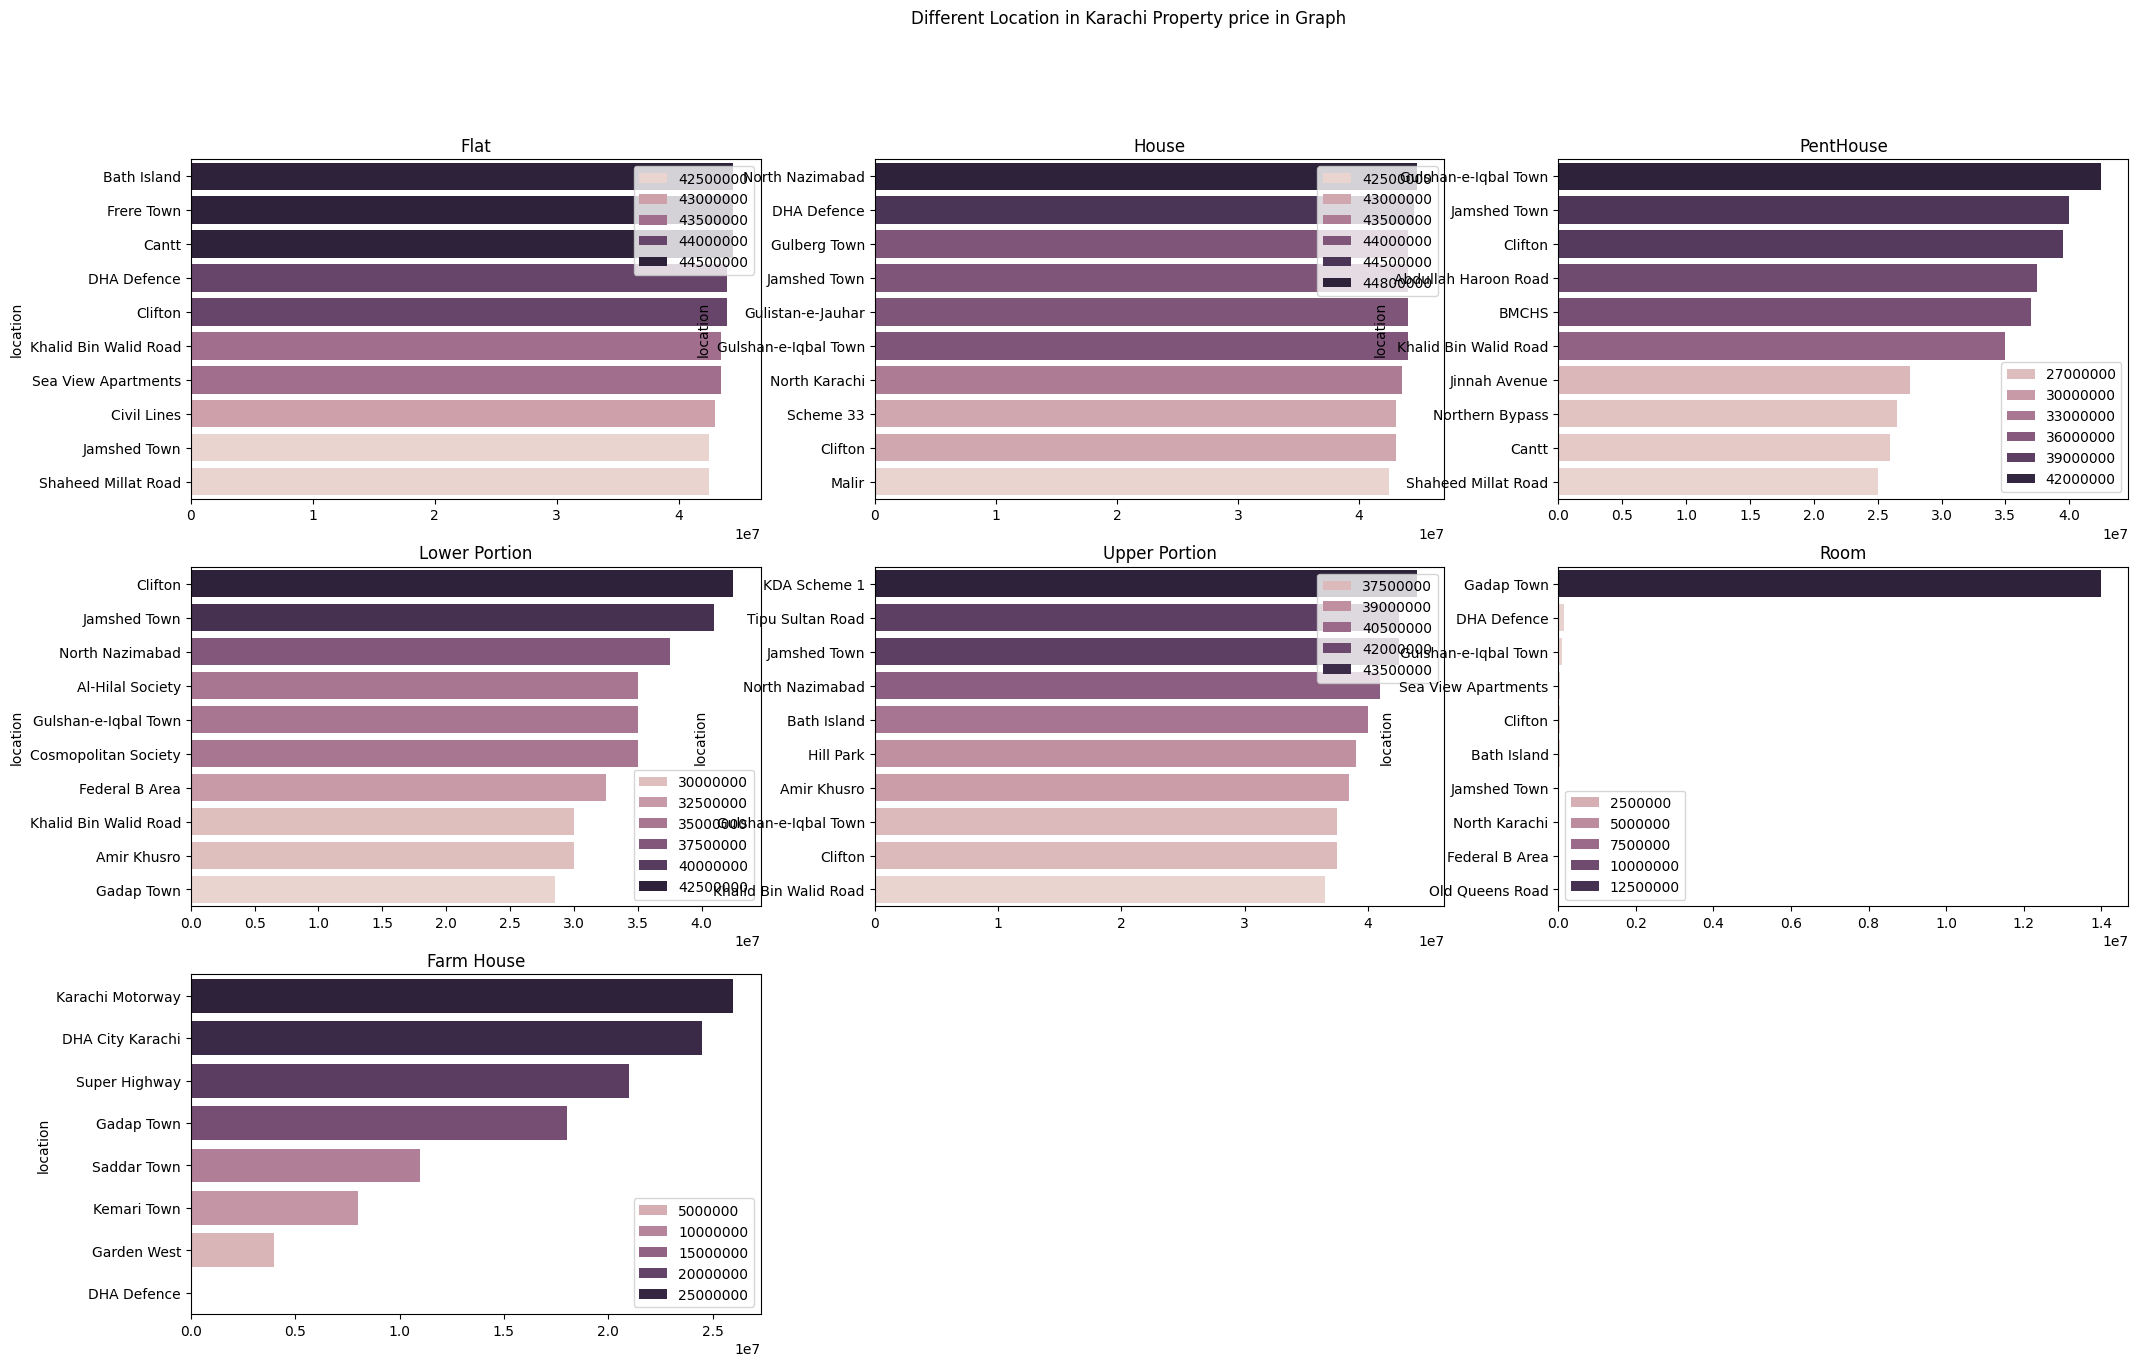

In [100]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.barplot(x=y,y=x,hue=flat.values)
plt.title("Flat")

plt.subplot(3,3,2)
sns.barplot(x=housey,y=housex,hue=flat_house.values)
plt.title("House")

plt.subplot(3,3,3)
sns.barplot(x=Penthousey,y=Penthousex,hue=flat_Penthouse.values)
plt.title("PentHouse")

plt.subplot(3,3,4)
sns.barplot(x=Lowery,y=Lowerx,hue=flat_Lower.values)
plt.title("Lower Portion")

plt.subplot(3,3,5)
sns.barplot(x=Uppery,y=Upperx,hue=flat_Upper.values)
plt.title("Upper Portion")

plt.subplot(3,3,6)
sns.barplot(x=Roomy,y=Roomx,hue=flat_Room.values)
plt.title("Room")

plt.subplot(3,3,7)
sns.barplot(x=Farm_Housey,y=Farm_Housex,hue=Farm_House.values)
plt.title("Farm House")

plt.suptitle("Different Location in Karachi Property price in Graph")
plt.show()

In [ ]:
#Check for correlations between numerical features:

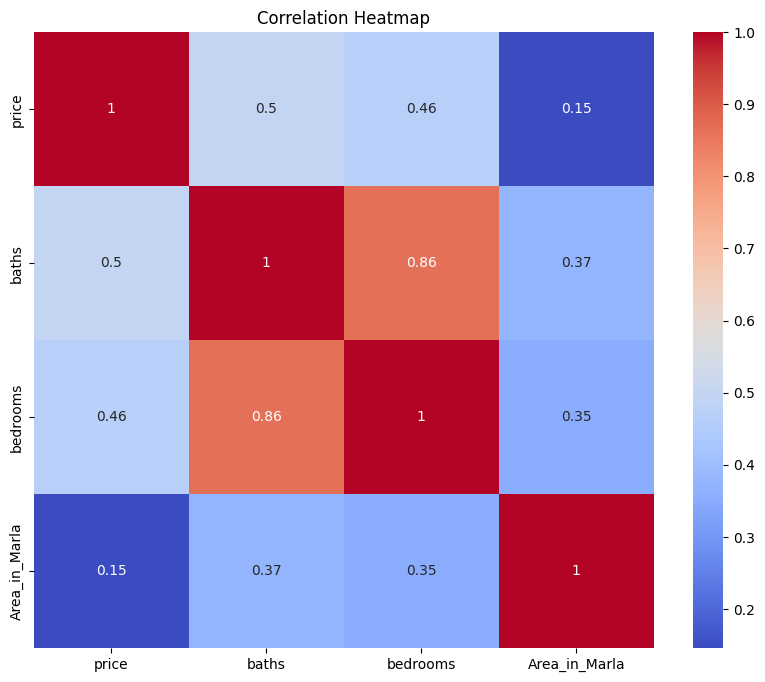

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price', 'baths', 'bedrooms', 'Area_in_Marla']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

City-specific Insights:

Karachi — The Hub of Diversity: Unravel the eclectic property market of Karachi, showcasing its supremacy in flat, upper/lower portion, and room prices.

Islamabad — The Capital of Luxe Living: Analyze why Islamabad reigns supreme in house and penthouse prices, reflecting a penchant for upscale living.

Faisalabad — Embracing Farmhouse Charm: Explore Faisalabad’s unique position as the leader in farmhouse prices, uncovering the factors contributing to this trend.

Conclusion: As we conclude our exploration, we invite readers to immerse themselves in the intricacies of Pakistan’s real estate market. This analysis not only provides a snapshot of current property prices but also serves as a compass for investors, real estate professionals, and enthusiasts navigating the dynamic terrain of urban property markets. Through data-driven insights, we illuminate the paths leading to investment opportunities, market trends, and informed decision-making in the ever-evolving world of real estate in Pakistan.